# Exploratory Data Analysis

Exploratory Data Analysis (EDA) in statistics can be defined as an approach to analyzing data sets to summarize their main characteristics, often with visual methods. Primarily, EDA is used to see what the data can tell us before formally modeling and hypothesis testing.

# Assignment 1 : Perform EDA on Haberman's Cancer Survival Dataset

**_Description of the dataset :_**

The Dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

**_Attributes Information in the dataset :_**

1. Age of the Patient at the time of operation.
2. Patient's year of operation.
3. The Number of positive axillary nodes detected.
4. Survival status 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

**_Domain Knowledge :_**

Lymph nodes are small, bean-shaped organs that act as filters along the lymph fluid channels. As lymph fluid leaves the breast and eventually goes back into the bloodstream, the lymph nodes try to catch and trap cancer cells before they reach other parts of the body. Having cancer cells in the lymph nodes under your arm suggests an increased risk of the cancer spreading. 
**When lymph nodes are free, or clear, of cancer, the test results are negative. If lymph nodes have some cancer cells in them, they are called positive.** Your pathology report will tell you how many lymph nodes were removed, and of those, how many tested positive for the presence of cancer cells. 
**For example, 0/3 means 3 nodes were removed and 0 were positive, while 2/5 means 5 were removed and 2 were positive.**

**_Objective :_**

The objective of performing this analysis is to **classify whether a person will survive the surgery or not**, given the _patient's Age, Year of Operation and the number of axillary nodes detected._

**_Data loading and Pre-Processing_**

In [1]:
# Importing the Important Libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset

try :
    columnNamesList = ["PatientAge", "PatientYearOperation", "NumberAxillaryNodes", "SurvivalStatus"]
    cancer_data = pd.read_csv('./../../Dataset/haberman.csv', names=columnNamesList);
    print("Loaded the dataset successfully.")
except(FileNotFoundError):
    print("Make sure you check the path of the file")
except:
    print("An Error occured.")


Loaded the dataset successfully.


In [3]:
# Printing the top 5 rows for inital analysis of the dataset

cancer_data.head()

,PatientAge,PatientYearOperation,NumberAxillaryNodes,SurvivalStatus
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


**_Observation(s) :_**
1. By looking at just the top 5 rows, we can observe that the dataset contains 4 columns (all numeric).
2. The Survival Status column is the class attribute of the dataset.

In [4]:
unique_valuesList = list(cancer_data["SurvivalStatus"].unique())
print(cancer_data.info())
print("\nThe Unique values in the class attribute column are : {}".format(unique_valuesList))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
PatientAge              306 non-null int64
PatientYearOperation    306 non-null int64
NumberAxillaryNodes     306 non-null int64
SurvivalStatus          306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None

The Unique values in the class attribute column are : [1, 2]


**_Observation(s) :_**
1. The total number of observations/data points are 306.
2. We can now confirm that all the columns in the dataset are numeric.
3. There are no missing values in the dataset.
4. Since the SurvivalStatus column is the class attribute, it's data-type need to be changed from numeric to categorical datatype.
5. The Survival Status can be mapped as 'Survived' for those patients who survived after surgery and 'Died' for those patients who unfortunately died within 5 years after surgery. That is, 1 -> 'Survived and 2 -> 'Died'

In [5]:
# Data Preprocessing
# Since the class attributes of the dataset i.e Survival Status is numeric, it needs to properly mapped.
# 1 -> 'Survived' and 2 -> 'Died'

cancer_data["SurvivalStatus"].replace(to_replace = {
    1: "Survived",
    2: "Died"
}, inplace = True)

print(cancer_data.info())
print(cancer_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
PatientAge              306 non-null int64
PatientYearOperation    306 non-null int64
NumberAxillaryNodes     306 non-null int64
SurvivalStatus          306 non-null object
dtypes: int64(3), object(1)
memory usage: 9.6+ KB
None
       PatientAge  PatientYearOperation  NumberAxillaryNodes
count  306.000000            306.000000           306.000000
mean    52.457516             62.852941             4.026144
std     10.803452              3.249405             7.189654
min     30.000000             58.000000             0.000000
25%     44.000000             60.000000             0.000000
50%     52.000000             63.000000             1.000000
75%     60.750000             65.750000             4.000000
max     83.000000             69.000000            52.000000


**_Observation(s) :_**
1. The dataset consists of data for 306 patients recorded between the year 1958 to 1969.
2. Attributes such as Patient's Age, Patient's year of operation and the number of positive axillary nodes detected contribute towards the classification of the class attribute i.e. Survival Status.
3. The Patient's age varies between 30 and 83 having an average age of 52.
4. The number of positive axillary nodes vary between 0 to 52, having the average number of detected nodes to be 4.
5. About 25% of the patients are having no positive axillary nodes detected and about 75% of the patients have less than 5 axillary nodes detected.

In [6]:
print(cancer_data["SurvivalStatus"].value_counts())
print("\n" + str(cancer_data["SurvivalStatus"].value_counts(normalize = True)))

Survived    225
Died         81
Name: SurvivalStatus, dtype: int64

Survived    0.735294
Died        0.264706
Name: SurvivalStatus, dtype: float64


**_Observation(s) :_**
1. As per the analysis on the class attribute of the dataset, we can observe that the dataset is imbalanced since the total number of values in the class attribute are not equal.
2. Around 73% of the patients survived after the surgery whereas around 26% of the patients, unfortunately, died within 5 years of surgery.

In [7]:
print(cancer_data.isnull().any())
print("--------------------------")
print(cancer_data.count())

PatientAge              False
PatientYearOperation    False
NumberAxillaryNodes     False
SurvivalStatus          False
dtype: bool
--------------------------
PatientAge              306
PatientYearOperation    306
NumberAxillaryNodes     306
SurvivalStatus          306
dtype: int64


**_Observation(s) :_**
1. The dataset does not contain any NA/null/NaN values with every feature having 306 observations each.

## Univariate Analysis

Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words, your data has only one variable. It doesn’t deal with causes or relationships (unlike regression) and its major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.


**_PDF - CDF Plots :_**

/home/rushabh/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


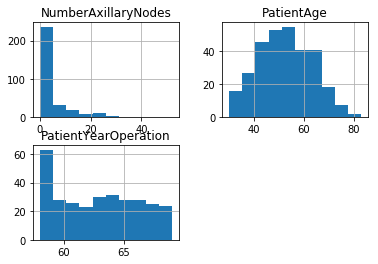

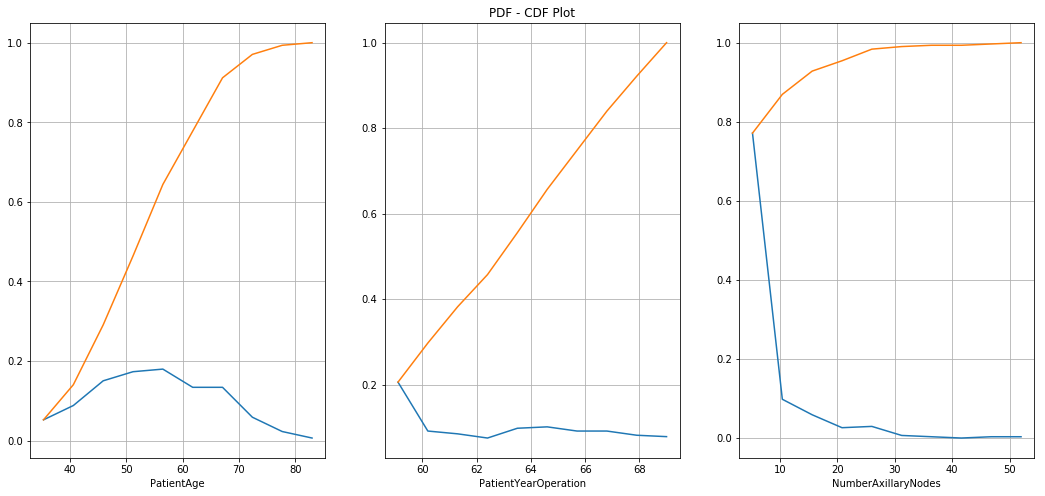

In [8]:
plt.close()
cancer_data.hist()
plt.figure(figsize=(18,8))
plt.subplot(1, 3, 2)
plt.title("PDF - CDF Plot")

for index, feature in enumerate(list(cancer_data.columns)[:-1]):
    plt.subplot(1, 3, index+1)
    counts, bin_edges = np.histogram(cancer_data[feature], bins = 10, density = True)
    pdf = counts / sum(counts)
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:], pdf)
    plt.plot(bin_edges[1:], cdf)
    plt.xlabel(feature)
    plt.grid()

plt.show()


**_Observation(s):_**
1. About ~13% of the patients are below the age of 40 and we are having maximum patients between the age of 45-60. The PDF of the Patient Age graph shows that there are very less or zero(approaching) number of patients above the age of 80.
2. About ~30% of the operations happened between 1958 and 1960. We can also see that there was a sudden drop in the patients between the years 1961 to 1962.
3. About ~88% of the patients have less than 10 positive axillary nodes and about ~98% of the patients have less than 28 positive axillary nodes.

**_Box-Plots :_**

/home/rushabh/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


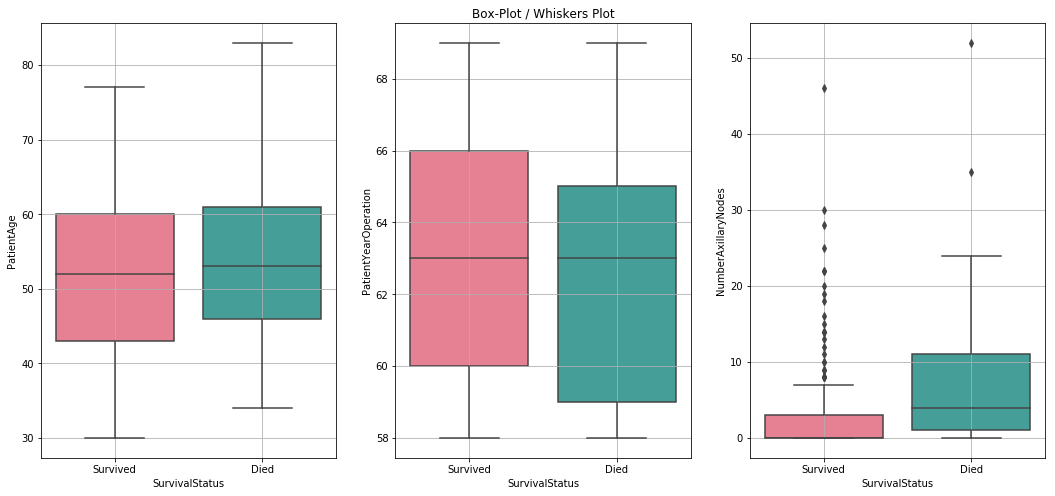

In [9]:
plt.close()
plt.figure(figsize=(18,8))
for index, columnY in enumerate(list(cancer_data.columns)[:-1]):
    plt.subplot(1, 3, index+1)
    sns.boxplot(x="SurvivalStatus", y=columnY, data=cancer_data, palette='husl')
    plt.grid()
plt.subplot(1, 3, 2)
plt.title("Box-Plot / Whiskers Plot")
plt.show()

**_Observation(s) :_**
1. The Patient's who are having age between 30 to 34 have survived. Also, the patients who are having age more than 77 have unfortunately died. However, the mean of both the survival status according to the patient's age is the same.
2. It is quite evident from the whisker's plot between survival status and patient's year of operation that patient who was undergoing an operation before 1960 and after 1965 had higher chances of survival. However, we cannot confirm the reason why! Confidently trying to infer from such graph is quite difficult.
3. The patients who are having less than 3 positive axillary nodes had higher chances for survival. Also, the patients who are having more than 10 positive Axillary nodes had very fewer chances of survival.
4. Thus, just by the overall conclusion, we can infer that the year of operation does not add any luck towards the classification.

**_Violin-Plot :_**

/home/rushabh/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


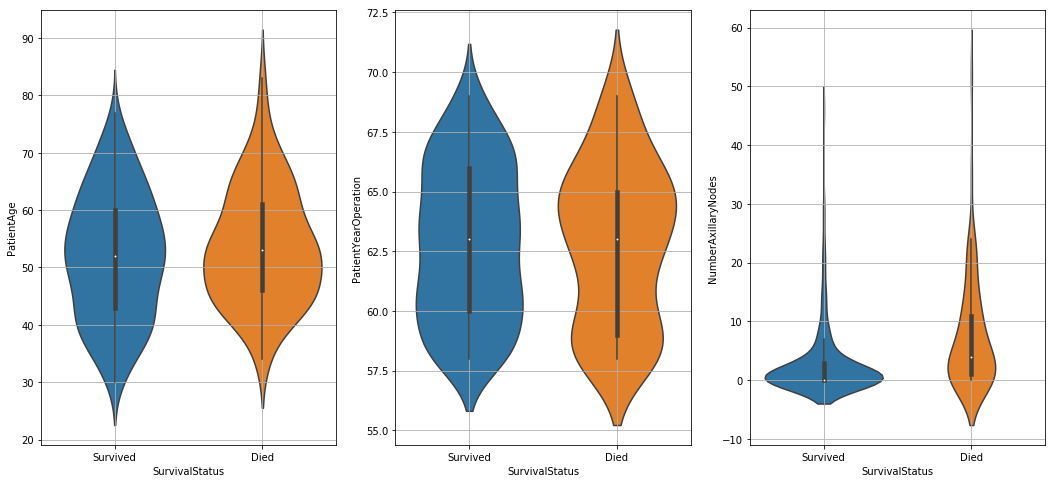

In [10]:
plt.close()
plt.figure(figsize=(18,8))
for index, columnY in enumerate(list(cancer_data.columns)[:-1]):
    plt.subplot(1, 3, index+1)
    sns.violinplot(x="SurvivalStatus", y=columnY, data=cancer_data)
    plt.grid()
plt.show()

**_Observation(s) :_**
1. The Violin plot between the axillary nodes and the survival status shows that the probability of the patients surviving after the operations is high when the number of positive axillary nodes are less than ~5.

## Bivariate Analysis

Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of the relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between the two variables and the significance of these differences. There are three types of bivariate analysis. 		
    1. Numerical & Numerical
    2. Categorical & Categorical
    3. Numerical & Categorical

**_Scatter-Plot :_**

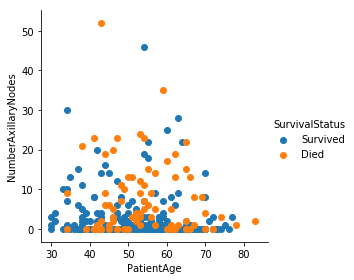

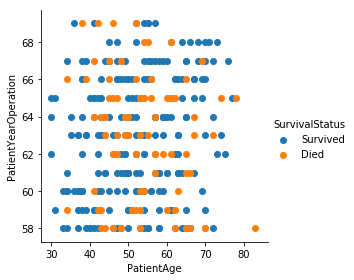

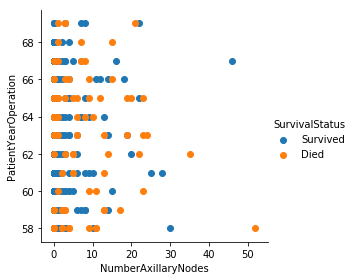

In [11]:

a = sns.FacetGrid(data=cancer_data, hue="SurvivalStatus", height=4)\
    .map(plt.scatter, "PatientAge", "NumberAxillaryNodes")\
    .add_legend()

b = sns.FacetGrid(data=cancer_data, hue="SurvivalStatus", height=4)\
    .map(plt.scatter, "PatientAge", "PatientYearOperation")\
    .add_legend()

c = sns.FacetGrid(data=cancer_data, hue="SurvivalStatus", height=4)\
    .map(plt.scatter, "NumberAxillaryNodes", "PatientYearOperation")\
    .add_legend()
plt.show()

**_Observation(s) :_**
1. The features are not linearly seperable. All the features are highly dense.
2. We cannot differentiate between the features using if-else conditions. Complex algorithm processing will be required in order to infer from it.

**_Pair-Plot :_**

/home/rushabh/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


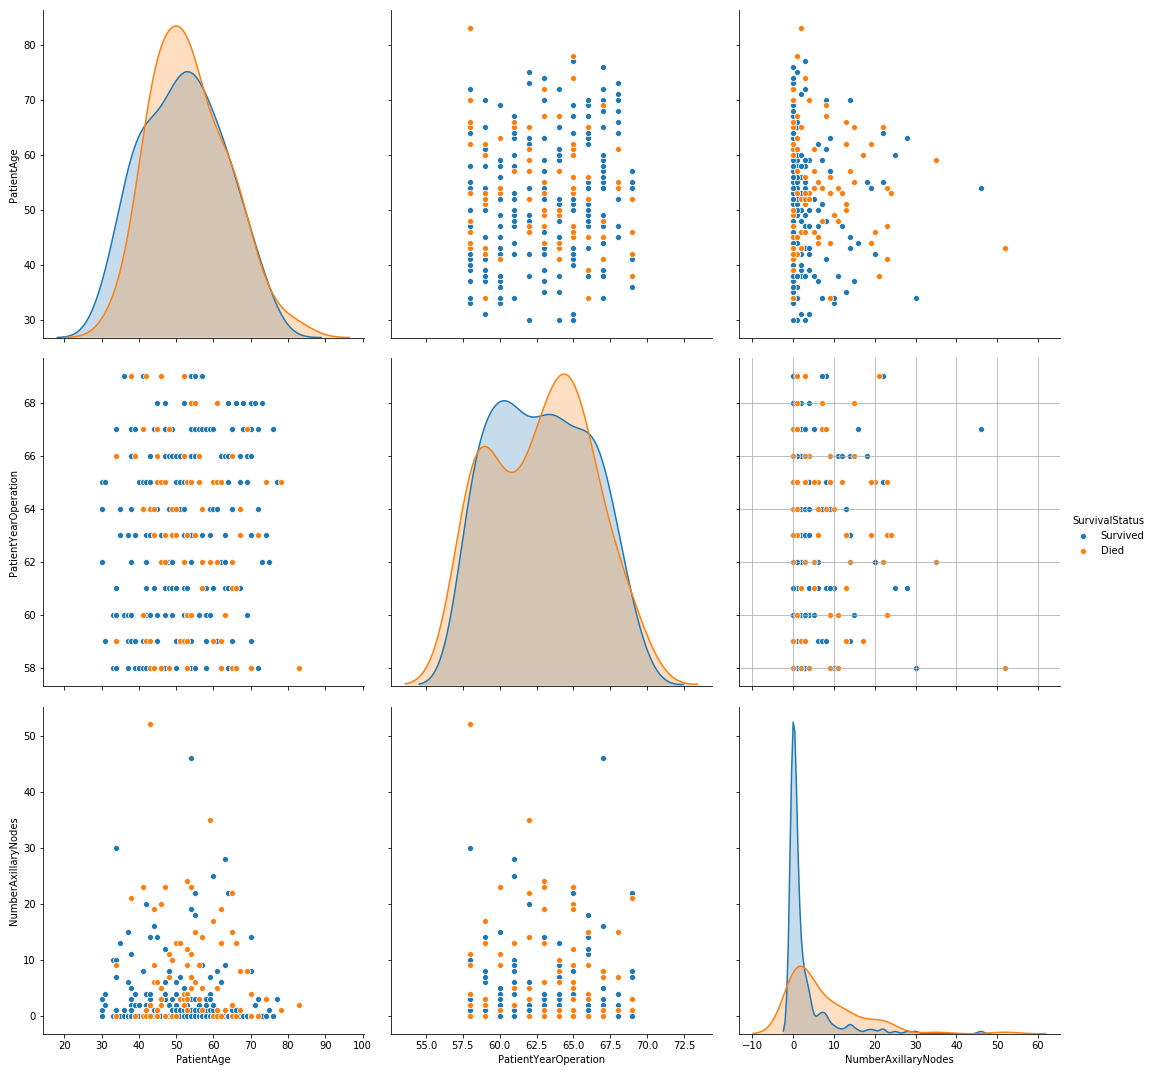

In [12]:
plt.close()
sns.pairplot(data=cancer_data, hue="SurvivalStatus", height=5)
plt.grid()
plt.show()

**_Observation(s) :_**
1. The Patient's year of operation doesn't seem to have an effect on the classification.
2. The Patient's Age and the number of axillary nodes seems to add some little/minor useful characteristics to the classification.
3. However, Bivariate analysis of the Haberman's data set is not much help.

**CONCLUSION**

Considering the above plots, just by the overall look, we can say that the plots of the attributes are highly overlapped. An inference from such plots would be quite difficult.

But, the patient's age and the number of positive axillary nodes have some useful characteristics for classification which can be more revealed by more advanced machine learning algorithms.